In [1]:
# 画图工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:\windows\fonts\MicroSoft YaHei.ttc", size=12)
# %matplotlib inline 
# auto 弹出窗口 inline 默认，在当前页显示
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

import math
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import matplotlib as mpl

warnings.filterwarnings('ignore')

large=22;med=16;small=12;
params={'axes.titlesize':large,
        'legend.fontsize':med,
        'figure.figsize':(16,10),
        'axes.labelsize':med,
        'axes.titlesize':med,
        'xtick.labelsize':med,
        'ytick.labelsize':med,
        'figure.titlesize':large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
print(mpl.__version__)
print(sns.__version__)


3.3.1
0.10.1


In [2]:
from ipywidgets import widgets,Button,Label
from statsmodels.tsa.seasonal import STL
from my_functions import L_plot1_twoaxis

In [3]:
# 导入数据
df = pd.read_excel(r"C:\Users\57165\Desktop\data\datas\wjl1.xlsx",sheet_name='Sheet1',dtype={'sxl':str,'szl':str,'srq':str})
df=df.fillna(0)
df['drq']=pd.to_datetime(df['drq'])
df.head()

,drq,srq,sxl,szl,sdl,nzxssl,nzxsje,nzml,nzzb,nzhzb
0,2019-01-01,0101,070901火锅丸子,0709火锅食品,07冷冻冷藏,82.4020,2060.3890,510.1994,576.617462,37.713846
1,2019-01-02,0102,070901火锅丸子,0709火锅食品,07冷冻冷藏,35.4681,912.5801,219.9758,206.510165,15.935429
2,2019-01-03,0103,070901火锅丸子,0709火锅食品,07冷冻冷藏,29.8797,670.5486,164.1387,187.111587,14.452099
3,2019-01-04,0104,070901火锅丸子,0709火锅食品,07冷冻冷藏,50.6495,1098.0096,271.6119,238.422645,19.695129
4,2019-01-05,0105,070901火锅丸子,0709火锅食品,07冷冻冷藏,47.2806,1226.2472,302.3078,288.403415,22.154610


In [4]:
# 分类销售和销量、指标 每日销售情况
@widgets.interact_manual(
    color=['blue', 'red', 'green',''],snr=['nzxsje','nzxssl','nzhzb','nzzb'],sxl=sorted(df['sxl'].unique()))
# 分店汇总

def plot1(color='blue',sxl='070901火锅丸子', grid=False,snr='nzxsje'):
    t = df['drq'].unique()
    k=df[df['sxl']==sxl][snr]
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    ax.plot(t, k,color=color)
    ax.set_xticks(list([t[i] for i in range(len(t)) if i%60==0]))
    plt.xticks(rotation=30)
    ax.legend([sxl])
    ax.grid(grid)

interactive(children=(Dropdown(description='color', options=('blue', 'red', 'green', ''), value='blue'), Dropd…

In [5]:
# 导入数据
df1 = pd.read_excel(r"C:\Users\57165\Desktop\data\datas\wjl1.xlsx",sheet_name='Sheet2',dtype={'srq':str,'sxl':str,'szl':str}
,converters={'nzhzb':lambda x:round(x,2),'nzzb':lambda x:round(x,2)})
df1=df1.fillna(0)

df1.head()

,srq,sxl,szl,sdl,nzxssl,nzxsje,nzml,nzzb,nzhzb
0,0101,070901火锅丸子,0709火锅食品,07冷冻冷藏,83.9075,2099.7831,486.5544,531.74,34.81
1,0102,070901火锅丸子,0709火锅食品,07冷冻冷藏,44.7919,1126.4968,263.9356,259.08,18.27
2,0103,070901火锅丸子,0709火锅食品,07冷冻冷藏,46.8191,1119.5802,258.6094,255.27,17.61
3,0104,070901火锅丸子,0709火锅食品,07冷冻冷藏,47.1179,1077.3580,254.6716,247.75,19.19
4,0105,070901火锅丸子,0709火锅食品,07冷冻冷藏,42.6091,1086.4321,256.2005,250.66,18.32


In [6]:
def L_plot(x,y):
        L=(
                Line(init_opts=opts.InitOpts(width="1000px", height="500px",theme=ThemeType.LIGHT))
                .add_xaxis(x)
                
                .set_global_opts(
                        title_opts=opts.TitleOpts(title="季节性", subtitle=""),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15),name='日期',type_="category",
                        ),
                        tooltip_opts=opts.TooltipOpts(trigger='axis'),
                        yaxis_opts=opts.AxisOpts(name='指标'),
                        datazoom_opts=[
                opts.DataZoomOpts(
                        is_realtime=True,
                        # type_="inside",
                        # start_value=30,
                        # end_value=70,
                        # xaxis_index=[0, 1],
                )]
                        )
        )
        for i in range(len(y.columns)):
                tmp=y.columns[i]
                L.add_yaxis(tmp,y[tmp],color='red',label_opts=opts.LabelOpts(is_show=False),)
        L.render_notebook()

In [7]:
def L_plot1(x,y):
        y=pd.DataFrame(y);
        L=(
                Line(init_opts=opts.InitOpts(width="1000px", height="300px",theme=ThemeType.LIGHT))
                .add_xaxis(x)
                
                .set_global_opts(
                        title_opts=opts.TitleOpts(title="季节性", subtitle=""),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15),name='日期',type_="category",
                        ),
                        tooltip_opts=opts.TooltipOpts(trigger='axis'),
                        yaxis_opts=opts.AxisOpts(name='指标'),
                        datazoom_opts=[
                opts.DataZoomOpts(
                        is_realtime=True,
                        type_="slider",
                        range_start=0,
                        range_end=100,
                        # xaxis_index=[0, 1],
                )]
                        )
                
        )
        for i in range(len(y.columns)):
                tmp=y.columns[i]
                L.add_yaxis(tmp,y[tmp],color='red',label_opts=opts.LabelOpts(is_show=False),)
        return L.render_notebook()

In [8]:
# 分类销售和销量、指标 每日销售情况
@widgets.interact_manual(
    color=['blue', 'red', 'green',''],snr=['nzxsje','nzxssl','nzhzb','nzzb'],sxl=sorted(df1['sxl'].unique()))
# 分店汇总

def plot1(color='blue',sxl='071001冰淇淋', grid=False,snr='nzxsje'):
    t = df1['srq'].unique()
    k=df1[df1['sxl']==sxl][[snr]]
    fig, ax1 = plt.subplots(1, 1, figsize=(18, 6))
    ax1.plot(t, k,color=color)
    
    
    # 次坐标
    ax2=ax1.twinx()
    plt.plot(t,df1[df1['sxl']==sxl]['nzzb'],'-.',color='red')
    ax1.set_xticks(list([t[i] for i in range(len(t)) if i%20==0]))
    # plt.xticks(rotation=30)
    ax1.grid(grid)
    ax1.legend([sxl])

    stl = STL(df1[df1['sxl']==sxl]['nzzb'], period=20, robust=True)
    res_robust = stl.fit()
    fig = res_robust.plot()

    # 正态性检验

interactive(children=(Dropdown(description='color', options=('blue', 'red', 'green', ''), value='blue'), Dropd…

In [9]:
from pyecharts.charts import Bar,Line
import pyecharts.options as opts
from pyecharts.globals import ThemeType
import xlsxwriter
from pandas import ExcelWriter

In [10]:
# 分类销售和销量、指标 每日销售情况
@widgets.interact_manual(
    color=['blue', 'red', 'green',''],snr=['nzxsje','nzxssl','nzhzb','nzzb'])
# 分店汇总

def plot2(color='blue',MutableSequence=sorted(df1['sxl'].unique()), grid=False,snr='nzxsje'):
    t = df1['srq'].unique()
    k=df1[df1['sxl']==MutableSequence][[snr]]
    
    stl = STL(df1[df1['sxl']==MutableSequence]['nzzb'], period=20, robust=True)
    res_robust = stl.fit()
    fig = res_robust.plot()
    return L_plot1_twoaxis(t,k) 
    # 正态性检验

interactive(children=(Dropdown(description='color', options=('blue', 'red', 'green', ''), value='blue'), Dropd…

In [11]:
t = df1['srq'].unique()
k=df1[df1['sxl']=='071001冰淇淋']['nzzb'] # 071001冰淇淋 090402蚊香 110102实芯纸  100410护/润唇膏
stl = STL(k,period=20, robust=True)
res_robust = stl.fit()

In [12]:
r=pd.DataFrame([res_robust.observed,res_robust.seasonal,res_robust.trend,res_robust.resid,res_robust.weights]) 
r=r.T

l=pd.DataFrame([res_robust.weights]).T
# r.to_excel(r'C:\Users\57165\Desktop\data\datas\r2.xlsx')
# with ExcelWriter(r'C:\Users\57165\Desktop\data\datas\r.xlsx',mode='a') as writer:
#     l.to_excel(writer,sheet_name='sheet21')


In [13]:
# STL 分解
ml=pd.DataFrame(res_robust.trend)
ml=ml.set_index(t)
# 归一化
ml['diff']=ml.apply( lambda x: (x-ml.min())/(ml.max()-ml.min()) ,axis=1  )
m2=ml.diff()
m2=m2.set_index(t)
# fig,ax=plt.subplots(1,1,figsize=(16,6))
# plt.plot(m2.index,m2['diff'])
# ax.set_xticks(list([t[i] for i in range(len(t)) if i%20==0]))
# ax.grid(True)
# plt.xticks(rotation=-30)
# plt.show()
m2['trend']=list(ml['diff'])
L_plot1_twoaxis(m2.index,m2)



In [14]:
from scipy.optimize import fsolve
from sympy import *

In [15]:
# 曲线拟合并求解
x=m2['trend']
x=x.fillna(0)
i=range(1,len(x)+1)
z=np.polyfit(i,x,2)
p=np.poly1d(z)
# plt.plot(p(i))
z
# 解出0根,根据


array([-3.37239009e-05,  1.22541694e-02, -3.23530855e-01])

In [16]:
d=m2['trend']
print(np.mean(d),np.std(d),d.skew(),d.kurt(),np.percentile(d,75,axis=0))

0.4130925200510799 0.3784792176466467 0.2251710831264306 -1.6818977858356596 0.7987193241033543


In [17]:
# 冬 春 季节性，需要对数据做平移处理，即降1-3月份的数据移动到12月之后
df1['srq1']=df1['srq'].apply(lambda x : str(int(x[0:2])+12)+x[2:4])
df2=df1.copy()
df2['srq']=df2['srq1']
df3=df1[df1['srq']>='0401']
df3=df3.append(df2[df2['srq']<'1601'])
df3

,srq,sxl,szl,sdl,nzxssl,nzxsje,nzml,nzzb,nzhzb,srq1
91,0401,070901火锅丸子,0709火锅食品,07冷冻冷藏,3.5889,60.6782,12.8243,14.50,1.66,1601
92,0402,070901火锅丸子,0709火锅食品,07冷冻冷藏,10.1999,194.7651,40.0894,46.62,5.06,1602
93,0403,070901火锅丸子,0709火锅食品,07冷冻冷藏,8.6157,211.4126,37.9671,45.55,4.78,1603
94,0404,070901火锅丸子,0709火锅食品,07冷冻冷藏,10.3206,194.9439,37.7005,43.06,4.60,1604
95,0405,070901火锅丸子,0709火锅食品,07冷冻冷藏,8.5286,168.9358,32.0439,38.21,4.30,1605
...,...,...,...,...,...,...,...,...,...,...
11432,1527,110105干/湿纸巾,1101卷纸,11纸品,32.6666,129.4061,68.8166,71.57,8.48,1527
11433,1528,110105干/湿纸巾,1101卷纸,11纸品,25.6666,115.2130,49.0933,54.67,6.54,1528
11434,1529,110105干/湿纸巾,1101卷纸,11纸品,48.4000,167.6326,87.2666,102.33,12.12,1529
11435,1530,110105干/湿纸巾,1101卷纸,11纸品,43.0000,156.7662,75.1788,85.32,10.08,1530


In [18]:
t1 = df3['srq'].unique()
k1=df3[df3['sxl']=='071001冰淇淋']['nzzb'] # 071001冰淇淋 090402蚊香 110102实芯纸  100410护/润唇膏
stl1 = STL(k1, period=20, robust=True)
res_robust1 = stl1.fit()

# STL 分解
ml_1=pd.DataFrame(res_robust1.trend)
ml_1=ml_1.set_index(t1)
# 归一化
ml_1['diff']=ml_1.apply( lambda x: (x-ml_1.min())/(ml_1.max()-ml_1.min()) ,axis=1  )
m2_1=ml_1.diff()
m2_1=m2_1.set_index(t1)

m2_1['trend']=list(ml_1['diff'])
L_plot1_twoaxis(m2_1.index,m2_1)



poly1d([ 5.39199135e-09, -2.77773589e-03,  9.23371815e-01])

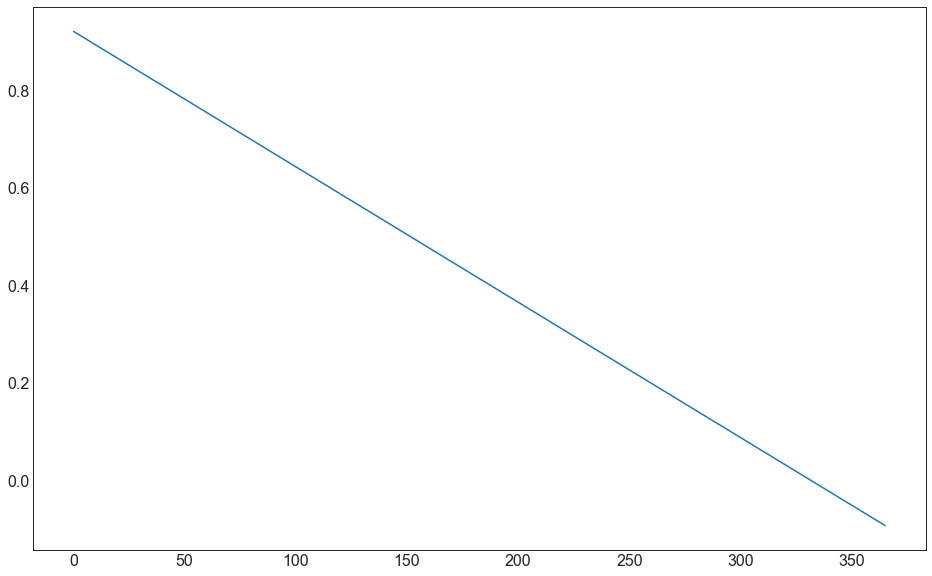

In [19]:
x=m2_1['trend']
x=x.fillna(0)
i=range(1,len(x)+1)
z=np.polyfit(i,x,2)
p=np.poly1d(z)
plt.plot(p(i))
p

In [20]:
# 